# Feeding the World (Dataquest Capstone Project)

Submission for an unguided 'final exam' project, based on the [FOOD WEALTH Bank of the World](https://www.kaggle.com/datasets/pranav941/-world-food-wealth-bank?resource=download&select=crop1.csv) dataset, made available by Pranav941 on Kaggle, featuring data on world food production over six decades.

# I. Disclaimers

A. Project is dataset-driven. It was not initiated by postulating a theory and looking for data that could help verify it, but rather by finding the aforementioned dataset that would be interesting to explore.<br><br>
B. This is a study project. It may and most likely will contain steps performed to tick off required project criteria, rather than to advance project goals, as well as notes for personal reference. I will do my best to clearly mark such occurences.<br><br>
C. My domain knowledge with respect to agriculture or husbandry is non-existent.<br><br>
D. Other projects based on the same dataset or approaching similar issues have not been reviewed prior to finalizing this task. Having access to existing solutions and opinions could conflict with the study goal, narrow the spectrum of issues that are sensible to approach, and extinguish interest in the topic.

# II. Outline
Given that the project is dataset-driven, primary questions/hypotheses will be specified after exploring the dataset. That said, there are several possible venues of interest:<br>
- efficiency (calories per unit of land per year), and whether rate of yield improvements has been able to match population growth rate;
- meat vs plant food (per unit of area and with efficiency in mind);
- food security (ability of countries to provide for own population, number of major food exporting countries and their clustering);
- deforestation and its connection to increase of farmable land or lack thereof.

Intended goals:<br>
A. Explore the data to check for limitations of the dataset.<br>
B. Summarize the current state of affairs with descriptive statistics.<br>
C. Look for trends in data.<br>
D. Explore a hypothesis from the broad-stroke list above.<br>
E. Suggest directions for further development of the project or dataset.<br>

The following was added after familiarizing with the data in parts III and IV below.

Hypothesis for the project: global agriculture is extensive, i.e. farmable areas grow at a higher pace than would be required to compensate for the difference between population growth and yield growth (if there is any).

Approach to testing the hypothesis will be outlined in more detail in part VI below.

# III. Exploring data and checking for dataset limitations

If anyone's reading this, this part should probably be skipped.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
crop_data = pd.read_csv('crop1.csv')
crop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1895975 entries, 0 to 1895974
Data columns (total 6 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Area     object 
 1   Item     object 
 2   Element  object 
 3   Year     int64  
 4   Unit     object 
 5   Value    float64
dtypes: float64(1), int64(1), object(4)
memory usage: 86.8+ MB


In [3]:
crop_data.sample(5)

,Area,Item,Element,Year,Unit,Value
319157,Côte d'Ivoire,Spices nes,Production,1971,tonnes,100.0
1811303,Least Developed Countries,Lentils,Production,1976,tonnes,252661.0
377474,Dominica,Nuts nes,Area harvested,1992,ha,NaN
1646306,South-eastern Asia,Wheat,Yield,2011,hg/ha,17670.0
305509,Costa Rica,Cassava,Area harvested,1991,ha,5700.0


In [4]:
crop_data['Element'].unique()

array(['Area harvested', 'Yield', 'Production'], dtype=object)

In [5]:
crop_data['Unit'].unique()

array(['ha', 'hg/ha', 'tonnes'], dtype=object)

In [6]:
crop_data['Item'].unique()

array(['Almonds, with shell', 'Anise, badian, fennel, coriander',
       'Apples', 'Apricots', 'Barley', 'Berries nes', 'Figs',
       'Fruit, citrus nes', 'Fruit, fresh nes', 'Fruit, stone nes',
       'Grapes', 'Linseed', 'Maize', 'Melons, other (inc.cantaloupes)',
       'Millet', 'Nuts nes', 'Onions, dry', 'Oranges',
       'Peaches and nectarines', 'Pears', 'Pistachios', 'Plums and sloes',
       'Potatoes', 'Pulses nes', 'Rice, paddy', 'Seed cotton',
       'Sesame seed', 'Spices nes', 'Sugar beet', 'Sugar cane',
       'Sunflower seed', 'Vegetables, fresh nes', 'Walnuts, with shell',
       'Watermelons', 'Wheat', 'Beans, dry', 'Beans, green',
       'Broad beans, horse beans, dry', 'Cabbages and other brassicas',
       'Carrots and turnips', 'Cauliflowers and broccoli', 'Cherries',
       'Chestnut', 'Chillies and peppers, green',
       'Cucumbers and gherkins', 'Dates', 'Eggplants (aubergines)',
       'Garlic', 'Hops', 'Leeks, other alliaceous vegetables',
       'Lemons an

In [7]:
print(sorted(crop_data['Year'].unique()))

[1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


In [8]:
zero_crops = crop_data[crop_data['Value'] == 0].copy()
zero_crops.shape

(10135, 6)

In [9]:
zero_crops.sample(10)

,Area,Item,Element,Year,Unit,Value
1099494,Slovakia,Grapefruit (inc. pomelos),Area harvested,2018,ha,0.0
562039,Hungary,Flax fibre and tow,Area harvested,1994,ha,0.0
422695,Estonia,"Fruit, citrus nes",Production,2020,tonnes,0.0
1631118,South-eastern Asia,Asparagus,Area harvested,1984,ha,0.0
201924,Canada,Hops,Production,2006,tonnes,0.0
1233492,Tunisia,Sugar beet,Area harvested,2009,ha,0.0
562128,Hungary,Flax fibre and tow,Production,1993,tonnes,0.0
1699503,Northern Europe,Eggplants (aubergines),Area harvested,2008,ha,0.0
855421,Nauru,Papayas,Area harvested,2020,ha,0.0
744418,Lithuania,"Vegetables, leguminous nes",Area harvested,2015,ha,0.0


In [10]:
null_crops = crop_data[crop_data['Value'].isnull()].copy()
null_crops.shape

(129500, 6)

In [11]:
null_crops[null_crops['Area'] == 'Ukraine']['Item'].unique()

array(['Berries nes', 'Broad beans, horse beans, dry', 'Castor oil seed',
       'Chestnut', 'Chick peas', 'Fruit, stone nes', 'Lentils',
       'Lettuce and chicory', 'Maize, green',
       'Melons, other (inc.cantaloupes)', 'Mushrooms and truffles',
       'Mustard seed', 'Oilseeds nes', 'Onions, shallots, green',
       'Pulses nes', 'Quinces', 'Safflower seed', 'Spinach', 'Sugar cane',
       'Vegetables, leguminous nes'], dtype=object)

First file in the dataset, 'crop1', has data on multiple farmable plants per country per year (from 1961 till 2020) with respect to production, yield and farmable area figures. Around 6% of the dataset is filled with null values.<br>
As a note, hereinafter 'farmable area', 'harvestable area', 'area under crops' and 'seeded area' can be used interchangeably.<br>

Making the following assumptions below:
- all primary crops are listed;
- zero and null values suggest that while production may be present, and even considerable, it is not significant comparable to production of primary crops, and everything is consumed locally.<br><br>

Running the following checks:
- whether most of the countries are covered;
- whether some rows with missing values only lack information on one of the elements (i.e., data on area and production, but not yield), which would indicate incomplete data/mistake rather than negligible values.<br><br>

[Countries of the World](https://www.kaggle.com/datasets/fernandol/countries-of-the-world?resource=download) dataset from Kaggle will be used to extract the list of countries as a basis for comparison.

In [12]:
countries_cia_data = pd.read_csv('countries of the world.csv')
countries_cia_data['Country'] = countries_cia_data['Country'].str.strip() #country names had spaces at the end

In [13]:
missing_countries = []
other_countries = []

tempx = countries_cia_data['Country'].unique()
tempy = crop_data['Area'].unique()

for country in tempx:
    if country not in tempy:
        missing_countries.append(country)
        
for country in tempy:
    if country not in tempx:
        other_countries.append(country)

Note to self: do NOT run methods within loops, predefine them if possible.

In [14]:
print('Missing countries:',
      '\n', missing_countries,
      '\n', '\n',
      'Countries not found in CIA factbook:',
      '\n', other_countries)

Missing countries: 
 ['American Samoa', 'Andorra', 'Anguilla', 'Antigua & Barbuda', 'Aruba', 'Bahamas, The', 'Bermuda', 'Bolivia', 'Bosnia & Herzegovina', 'British Virgin Is.', 'Brunei', 'Burma', 'Cape Verde', 'Cayman Islands', 'Central African Rep.', 'Congo, Dem. Rep.', 'Congo, Repub. of the', "Cote d'Ivoire", 'Czech Republic', 'East Timor', 'French Guiana', 'Gambia, The', 'Gaza Strip', 'Gibraltar', 'Greenland', 'Guam', 'Guernsey', 'Hong Kong', 'Iran', 'Isle of Man', 'Jersey', 'Korea, North', 'Korea, South', 'Laos', 'Liechtenstein', 'Macau', 'Macedonia', 'Mayotte', 'Micronesia, Fed. St.', 'Moldova', 'Monaco', 'Montserrat', 'Netherlands Antilles', 'N. Mariana Islands', 'Palau', 'Reunion', 'Russia', 'Saint Helena', 'Saint Kitts & Nevis', 'St Pierre & Miquelon', 'San Marino', 'Sao Tome & Principe', 'Swaziland', 'Syria', 'Taiwan', 'Tanzania', 'Trinidad & Tobago', 'Turks & Caicos Is', 'United Kingdom', 'United States', 'Venezuela', 'Vietnam', 'Virgin Islands', 'Wallis and Futuna', 'West Ba

Takeaways:
- most territories should be present in the dataset, and all major ones definitely are, if by different names;
- country list contains region groupings, which should be filtered out or used instead of individual countries to prevent duplicate values;
- countries have historic names for the given year, which requires caution, especially if more than ~30 years are used in analysis.

In [15]:
#grouping by crop in a given country and year, to see if rows with null values contain all 3 "elements" - production,
#area, and yield
temp_nullgroup = null_crops.groupby(['Area','Year','Item'])
temp_nullgroup.count()[temp_nullgroup.count() != 3]

Element  Unit  Value
Area        Year Item                                                  
Afghanistan 1961 Anise, badian, fennel, coriander        2     2      0
            1962 Anise, badian, fennel, coriander        2     2      0
            1963 Anise, badian, fennel, coriander        2     2      0
            1964 Anise, badian, fennel, coriander        2     2      0
            1965 Anise, badian, fennel, coriander        2     2      0
...                                                    ...   ...    ...
Zimbabwe    2016 Cow peas, dry                           2     2      0
            2017 Cow peas, dry                           2     2      0
            2018 Cow peas, dry                           2     2      0
            2019 Cow peas, dry                           2     2      0
            2020 Cow peas, dry                           2     2      0

[75977 rows x 3 columns]

In [16]:
crop_data[(crop_data['Area'] == 'Afghanistan')
          & (crop_data['Item'] == 'Anise, badian, fennel, coriander')
          & (crop_data['Year'] == 1963)]

,Area,Item,Element,Year,Unit,Value
139,Afghanistan,"Anise, badian, fennel, coriander",Area harvested,1963,ha,NaN
234,Afghanistan,"Anise, badian, fennel, coriander",Production,1963,tonnes,NaN


In [17]:
primaries = ['China, mainland', 'India', 'Russian Federation', 'United States of America',
             'France', 'Mexico', 'Japan', 'Germany', 'Turkey', 'Brazil']
null_primaries = crop_data[crop_data['Area'].isin(primaries)].copy()
null_primaries = null_primaries[null_primaries['Value'].isnull()]
print(null_primaries.shape, '\n', '\n', null_primaries['Area'].unique(),
      '\n', '\n', null_primaries['Item'].unique())

(7294, 6) 
 
 ['Brazil' 'China, mainland' 'France' 'Germany' 'India' 'Japan' 'Mexico'
 'Russian Federation' 'Turkey' 'United States of America'] 
 
 ['Almonds, with shell' 'Cashew nuts, with shell' 'Fruit, stone nes'
 'Fruit, tropical fresh nes' 'Grapefruit (inc. pomelos)' 'Nuts nes'
 'Peas, dry' 'Rubber, natural' 'Strawberries' 'Triticale' 'Tung nuts'
 'Walnuts, with shell' 'Anise, badian, fennel, coriander' 'Apricots'
 'Artichokes' 'Avocados' 'Cereals nes' 'Cherries' 'Chestnut' 'Chick peas'
 'Cinnamon (cannella)' 'Cloves' 'Coconuts' 'Cow peas, dry' 'Figs' 'Ginger'
 'Hazelnuts, with shell' 'Hops' 'Kiwi fruit'
 'Leeks, other alliaceous vegetables' 'Maize, green' 'Mustard seed'
 'Oil palm fruit' 'Papayas' 'Pistachios' 'Pulses nes' 'Quinces'
 'Safflower seed' 'Spices nes' 'Spinach' 'Tallowtree seed' 'Vanilla'
 'Vegetables, leguminous nes' 'Beans, dry' 'Berries nes' 'Buckwheat'
 'Fruit, citrus nes' 'Fruit, fresh nes' 'Lentils' 'Millet' 'Oilseeds nes'
 'Onions, shallots, green' 'Roots and 

Takeaways:
- roughly 4% of the data have null values only for two out of three elements (production, area and yield);
- for some of those, the row with the third element is missing completely;
- before venturing deeper, top 10 agricultural producing countries were explored for null values, and while all of them have rows with null values, those (i) do not cover primary crops and (ii) null values are less prevalent at around 2,5%.

At this point the decision was taken to leave all rows with null values, changing them to zeroes. Arguements in favor:
- restoring values is out of the question given the size and variability of the dataset;
- dropped row provides no information, while 0 value is still information (insignificant harvest and/or poor statistics and/or no export);
- specific figures are not required for project goals, just accurate enough gross data to determine trends with high enough probability;
- summarized country data can be verified vs regional/world data if necessary;
- eyeballing primary countries does not outright contradict the assumption that null values mark items with insignificant production and are not erroneous.

In [18]:
crop_data['Value'].fillna(value = 0, inplace = True)

For the purpose of the study project, below the 'crop1' original dataframe will be split into two tables, one with per country information, and the other with regional entries ('Central Asia', 'World', etc).

Afterwards, the other two files from the dataset, 'live1' and 'pop1', will undergo the same inspection and split.

In [19]:
regions = ['World', 'Africa', 'Eastern Africa', 'Middle Africa', 'Northern Africa',
                           'Southern Africa', 'Western Africa', 'Americas', 'Northern America', 'Central America',
                           'Caribbean', 'South America', 'Asia', 'Central Asia', 'Eastern Asia', 'Southern Asia',
                           'South-eastern Asia', 'Western Asia', 'Europe', 'Eastern Europe', 'Northern Europe',
                           'Southern Europe', 'Western Europe', 'Oceania', 'Australia and New Zealand', 'Melanesia',
                           'Micronesia', 'Polynesia', 'European Union (27)', 'Least Developed Countries',
                           'Land Locked Developing Countries', 'Small Island Developing States',
                           'Low Income Food Deficit Countries', 'Net Food Importing Developing Countries']
crop_data_regions = crop_data[crop_data['Area'].isin(regions)].copy()
crop_data_countries = crop_data[crop_data['Area'].isin(regions)==False].copy()
print(crop_data_regions['Area'].unique().shape,
      crop_data_countries['Area'].unique().shape,
      crop_data['Area'].unique().shape)

(34,) (211,) (245,)


In [20]:
livestock_data = pd.read_csv('live1.csv')
livestock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122467 entries, 0 to 122466
Data columns (total 6 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Area     122467 non-null  object 
 1   Item     122467 non-null  object 
 2   Element  122467 non-null  object 
 3   Year     122467 non-null  int64  
 4   Unit     122467 non-null  object 
 5   Value    120203 non-null  float64
dtypes: float64(1), int64(1), object(4)
memory usage: 5.6+ MB


In [21]:
livestock_data.sample(5)

,Area,Item,Element,Year,Unit,Value
15384,Canada,Mules,Stocks,1972,Head,4.000000e+03
68395,Peru,Cattle,Stocks,2006,Head,5.241102e+06
121245,Low Income Food Deficit Countries,Geese and guinea fowls,Stocks,1999,1000 Head,9.530000e+03
38993,Guinea-Bissau,Sheep,Stocks,1962,Head,1.150000e+05
97879,World,Goats,Stocks,2020,Head,1.128106e+09


In [22]:
print('Same countries: ', sorted(crop_data['Area'].unique()) == sorted(livestock_data['Area'].unique()), '\n',
     'Same years: ', sorted(crop_data['Year'].unique()) == sorted(livestock_data['Year'].unique()))

Same countries:  False 
 Same years:  True


In [23]:
countries_not_in_crops = []
countries_not_in_livestock = []

tempx = livestock_data['Area'].unique()
tempy = crop_data['Area'].unique()

for country in tempx:
    if country not in tempy:
        countries_not_in_crops.append(country)
        
for country in tempy:
    if country not in tempx:
        countries_not_in_livestock.append(country)

In [24]:
print('Countries not in crops:',
      '\n', countries_not_in_crops,
      '\n', '\n',
      'Countries not in livestock:',
      '\n', countries_not_in_livestock)

Countries not in crops: 
 [] 
 
 Countries not in livestock: 
 ['Maldives', 'Marshall Islands']


Moving on with the assumption that Maldives and Marshall Islands aren't exactly industry giants in terms of husbandry, and lack of data stems from lack of production.

In [25]:
livestock_data['Element'].unique()

array(['Stocks'], dtype=object)

In [26]:
livestock_data['Unit'].unique()

array(['Head', '1000 Head', 'No'], dtype=object)

While livestock dataset only has data on the number of animals, it has 3 unit types. Normalizing everything to 'Head', rather than thousands, and exploring the 'No' type below.

In [27]:
livestock_data[livestock_data['Unit'] == 'No']

,Area,Item,Element,Year,Unit,Value
540,Albania,Beehives,Stocks,1961,No,95100.0
541,Albania,Beehives,Stocks,1962,No,92800.0
542,Albania,Beehives,Stocks,1963,No,83500.0
543,Albania,Beehives,Stocks,1964,No,96500.0
544,Albania,Beehives,Stocks,1965,No,109800.0
...,...,...,...,...,...,...
121742,Net Food Importing Developing Countries,Beehives,Stocks,2016,No,17589382.0
121743,Net Food Importing Developing Countries,Beehives,Stocks,2017,No,18173526.0
121744,Net Food Importing Developing Countries,Beehives,Stocks,2018,No,18806147.0
121745,Net Food Importing Developing Countries,Beehives,Stocks,2019,No,18200185.0


In [28]:
livestock_data[livestock_data['Unit'] == 'No']['Item'].unique()

array(['Beehives'], dtype=object)

As seen above, 'No' most likely referred to number of units. Replacing all values in the unit columns with 'Head/Unit', multiplying by 1000 where necessary.

In [29]:
for i in range(len(livestock_data)):
    if livestock_data.loc[i, 'Unit'] == '1000 Head':
        livestock_data.loc[i, 'Value'] *= 1000
        livestock_data.loc[i, 'Unit'] = 'Head/Unit'
    else:
        livestock_data.loc[i, 'Unit'] = 'Head/Unit'

Study note: similar conversion was attempted for crop yield units, changing the uniform hg/ha values to more familiar t/ha, yet the loop took way too long to run; conversions were instead performed on filtered data right before visualisation/printing.

In [30]:
livestock_data.iloc[81193]

Area           Spain
Item           Ducks
Element       Stocks
Year            1962
Unit       Head/Unit
Value       724000.0
Name: 81193, dtype: object

In [31]:
livestock_data['Item'].unique()

array(['Asses', 'Camels', 'Cattle', 'Chickens', 'Goats', 'Horses',
       'Mules', 'Sheep', 'Beehives', 'Buffaloes', 'Ducks',
       'Geese and guinea fowls', 'Pigs', 'Rabbits and hares'],
      dtype=object)

In [32]:
livestock_data_regions = livestock_data[livestock_data['Area'].isin(regions)].copy()
livestock_data_countries = livestock_data[livestock_data['Area'].isin(regions)==False].copy()
print(livestock_data_regions['Area'].unique().shape,
      livestock_data_countries['Area'].unique().shape,
      livestock_data['Area'].unique().shape)

(34,) (209,) (243,)


Finally, having a look at 'pop1' table, hopefully containing some general data on countries.

In [33]:
pop_data = pd.read_csv('pop1.csv')
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265 entries, 0 to 264
Data columns (total 64 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  265 non-null    object 
 1   Country Code  265 non-null    object 
 2   1960          263 non-null    float64
 3   1961          263 non-null    float64
 4   1962          263 non-null    float64
 5   1963          263 non-null    float64
 6   1964          263 non-null    float64
 7   1965          263 non-null    float64
 8   1966          263 non-null    float64
 9   1967          263 non-null    float64
 10  1968          263 non-null    float64
 11  1969          263 non-null    float64
 12  1970          263 non-null    float64
 13  1971          263 non-null    float64
 14  1972          263 non-null    float64
 15  1973          263 non-null    float64
 16  1974          263 non-null    float64
 17  1975          263 non-null    float64
 18  1976          263 non-null    

In [34]:
pop_data.sample(5)

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
199,French Polynesia,PYF,78080.0,80705.0,83652.0,86847.0,90132.0,93442.0,96719.0,99990.0,...,268995.0,270332.0,271713.0,273119.0,274576.0,276108.0,277673.0,279285.0,280904.0,282534.0
15,Azerbaijan,AZE,3895398.0,4030325.0,4171428.0,4315127.0,4456691.0,4592601.0,4721528.0,4843872.0,...,9295784.0,9416801.0,9535079.0,9649341.0,9757812.0,9854033.0,9939771.0,10024283.0,10093121.0,10145212.0
253,St. Vincent and the Grenadines,VCT,80970.0,82168.0,83239.0,84200.0,85117.0,86009.0,86907.0,87779.0,...,108435.0,108624.0,108868.0,109135.0,109467.0,109826.0,110210.0,110593.0,110947.0,111269.0
78,Faroe Islands,FRO,34624.0,35074.0,35521.0,35965.0,36409.0,36843.0,37283.0,37705.0,...,47843.0,47901.0,47965.0,48055.0,48173.0,48326.0,48497.0,48677.0,48865.0,49053.0
112,"Iran, Islamic Rep.",IRN,21906909.0,22480371.0,23071309.0,23680246.0,24307855.0,24954865.0,25624380.0,26317776.0,...,75539881.0,76481963.0,77465769.0,78492208.0,79563991.0,80673888.0,81800204.0,82913893.0,83992953.0,85028760.0


In [35]:
countries_not_in_crops = []
countries_not_in_pops = []

tempx = pop_data['Country Name'].unique()
tempy = crop_data['Area'].unique()

for country in tempx:
    if country not in tempy:
        countries_not_in_crops.append(country)
        
for country in tempy:
    if country not in tempx:
        countries_not_in_pops.append(country)

In [36]:
print('Countries not in crops:',
      '\n', countries_not_in_crops,
      '\n', '\n',
      'Countries not in population:',
      '\n', countries_not_in_pops)

Countries not in crops: 
 ['Aruba', 'Africa Eastern and Southern', 'Africa Western and Central', 'Andorra', 'Arab World', 'American Samoa', 'Bahamas, The', 'Bermuda', 'Bolivia', 'Central Europe and the Baltics', 'Channel Islands', "Cote d'Ivoire", 'Congo, Dem. Rep.', 'Congo, Rep.', 'Caribbean small states', 'Curacao', 'Cayman Islands', 'Czech Republic', 'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific', 'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 'Egypt, Arab Rep.', 'Euro area', 'European Union', 'Fragile and conflict affected situations', 'Micronesia, Fed. Sts.', 'United Kingdom', 'Gibraltar', 'Gambia, The', 'Greenland', 'Guam', 'High income', 'Hong Kong SAR, China', 'Heavily indebted poor countries (HIPC)', 'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Isle of Man', 'Not classified', 'Iran, Islamic Rep.', 'Kyrgyz Republic', 'St. Kitts and Nevis', 'Korea, Rep.', 'Latin America & Ca

In [37]:
pop_data[pop_data['Country Name'] == 'Ukraine']

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
248,Ukraine,UKR,42664646.0,43206353.0,43752227.0,44288607.0,44796959.0,45264552.0,45684983.0,46063219.0,...,45593342.0,45489648.0,45272155.0,45154036.0,45004673.0,44831135.0,44622518.0,44386203.0,44132049.0,43814581.0


Problem: population data uses a different naming convention for countries, and a different, albeit similar, regional grouping.

Names will NOT be corrected, as livestock and crops data uses historic names for relevant periods, while population data uses current names for relevant territories. As such, any adjustments will have to be done carefully depending on the analysis goal, so leaving it for now.
As such, population data from [Countries of the World](https://www.kaggle.com/datasets/fernandol/countries-of-the-world?resource=download) dataset may be easier to use.

Filtering out data on regions below, though.

In [38]:
regions2 = ['World', 'Africa', 'Eastern Africa', 'Middle Africa', 'Northern Africa',
                           'Southern Africa', 'Western Africa', 'Americas', 'Northern America', 'Central America',
                           'Caribbean', 'South America', 'Asia', 'Central Asia', 'Eastern Asia', 'Southern Asia',
                           'South-eastern Asia', 'Western Asia', 'Europe', 'Eastern Europe', 'Northern Europe',
                           'Southern Europe', 'Western Europe', 'Oceania', 'Australia and New Zealand', 'Melanesia',
                           'Micronesia', 'Polynesia', 'European Union (27)', 'Least Developed Countries',
                           'Land Locked Developing Countries', 'Small Island Developing States',
                           'Low Income Food Deficit Countries', 'Net Food Importing Developing Countries',
          'Africa Eastern and Southern', 'Africa Western and Central', 'Arab World', 'Central Europe and the Baltics',
          'East Asia & Pacific (excluding high income)', 'Early-demographic dividend', 'East Asia & Pacific', 
          'Europe & Central Asia (excluding high income)', 'Europe & Central Asia', 'Euro area', 'European Union',
          'Fragile and conflict affected situations', 'High income', 'Heavily indebted poor countries (HIPC)', 
          'IBRD only', 'IDA & IBRD total', 'IDA total', 'IDA blend', 'IDA only', 'Not classified',
          'Latin America & Caribbean (excluding high income)', 'Latin America & Caribbean',
          'Least developed countries: UN classification', 'Low income', 'Lower middle income', 'Low & middle income',
          'Late-demographic dividend', 'Middle East & North Africa', 'Middle income',
          'Middle East & North Africa (excluding high income)', 'North America', 'OECD members', 'Other small states',
          'Pre-demographic dividend', 'Post-demographic dividend', 'South Asia', 'Sub-Saharan Africa (excluding high income)',
          'Sub-Saharan Africa', 'Small states', 'East Asia & Pacific (IDA & IBRD countries)',
          'Europe & Central Asia (IDA & IBRD countries)', 'Latin America & the Caribbean (IDA & IBRD countries)',
          'Middle East & North Africa (IDA & IBRD countries)', 'South Asia (IDA & IBRD)',
          'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income']
pop_data_regions = pop_data[pop_data['Country Name'].isin(regions2)].copy()
pop_data_countries = pop_data[pop_data['Country Name'].isin(regions2)==False].copy()
print(pop_data_regions['Country Name'].unique().shape,
      pop_data_countries['Country Name'].unique().shape,
      pop_data['Country Name'].unique().shape)

(47,) (218,) (265,)


Population table has extra data columns for 1960 and 2021 (other tables only go from 1961 till 2020); apart from that, 'Country Code' column in population table and 'Item' column in livestock table serve no purpose for project goals. Leaving it all in place just in case, though.

To summarize, any per-country analysis would have to be very careful given name mis-matches both across dataframes and over different time periods. Moreover, dataset lacks data on pastures and yield (both may be assumed given some industry-average per-head values), and lacks data on forest areas (hypothesis on deforestation will not be pursued).

# IV. Glimpse at current state of affairs: descriptive statistics

Below is a brief glance at global data. As COVID may have skewed 2020 data, 2019 was chosen instead.

In [39]:
crop_world = crop_data[crop_data['Area'] == 'World'].copy()
prod_sums = crop_world[(crop_world['Element'] == 'Production') & (crop_world['Year'] == 2019)].groupby('Item').sum()
prod_sums = prod_sums.sort_values(by = 'Value', ascending = False)

In [40]:
area_sums = crop_world[(crop_world['Element'] == 'Area harvested') & (crop_world['Year'] == 2019)].groupby('Item').sum()
area_sums = area_sums.sort_values(by = 'Value', ascending = False)

In [41]:
print('Average annual harvest per crop type, tonnes: %.0f' %(prod_sums['Value'].sum()/prod_sums['Value'].shape[0]))
print('Average harvestable area per crop type, hectares: %.0f' %(area_sums['Value'].sum()/area_sums['Value'].shape[0]))
print('Average annual yield across all crop types, tonnes per hectare: %.2f'
      %((prod_sums['Value'].sum()/prod_sums['Value'].shape[0]) / (area_sums['Value'].sum()/area_sums['Value'].shape[0])))

Average annual harvest per crop type, tonnes: 77592308
Average harvestable area per crop type, hectares: 11581391
Average annual yield across all crop types, tonnes per hectare: 6.70


Note to self: not the most elegant way to apply a function accross a series.

Figure for average annual yield is heavily skewed by widely used "heavy" crops, most notably sugar cane, and as such doesn't tell much.

In [42]:
prod_sums_other = prod_sums.drop(prod_sums.index[:10]).groupby('Year').sum()
prod_sums_pie = prod_sums.drop(prod_sums.index[11:]).drop(columns = 'Year').rename(index={'Tomatoes': 'Other'}
                                                                                      , columns ={'Value': 'Production, t'})
prod_sums_pie.loc[['Other'],['Production, t']] = prod_sums_other.iloc[0,0]
prod_sums_pie

,"Production, t"
Item,
Sugar cane,1.955308e+09
Maize,1.141360e+09
Wheat,7.649808e+08
"Rice, paddy",7.491899e+08
Oil palm fruit,4.158981e+08
Potatoes,3.548121e+08
Soybeans,3.363294e+08
Cassava,2.990282e+08
"Vegetables, fresh nes",2.951793e+08


In [43]:
area_sums_other = area_sums.drop(area_sums.index[:10]).groupby('Year').sum()
area_sums_pie = area_sums.drop(area_sums.index[11:]).drop(columns = 'Year').rename(index={'Groundnuts, with shell': 'Other'}
                                                                                      , columns ={'Value': 'Area, ha'})
area_sums_pie.loc[['Other'],['Area, ha']] = area_sums_other.iloc[0,0]
area_sums_pie

,"Area, ha"
Item,
Wheat,215899861.0
Maize,196356719.0
"Rice, paddy",161771753.0
Soybeans,121533206.0
Barley,51018550.0
Sorghum,39205092.0
Seed cotton,36716883.0
Rapeseed,34290153.0
"Beans, dry",33682529.0


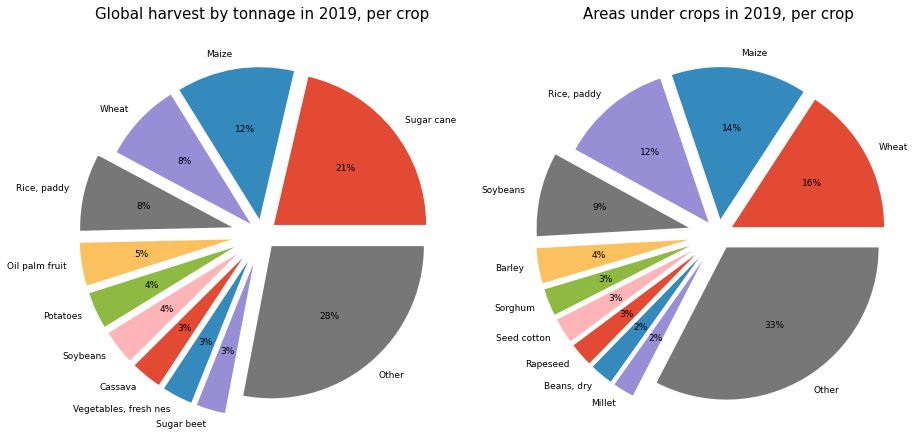

In [44]:
plt.style.use('ggplot')

explode = [0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.1]

fig = plt.figure(figsize = [15,30])

ax = fig.add_subplot(121)
prod_sums_pie['Production, t'].plot.pie(explode = explode,
                                         autopct='%1.0f%%',
                                         textprops={'fontsize': 9}) #study note: have not found a way to set different fontsize for autopct and text elements
plt.ylabel('')
plt.title('Global harvest by tonnage in 2019, per crop',
          y = 1.05, size = 15)


ax = fig.add_subplot(122)
area_sums_pie['Area, ha'].plot.pie(explode = explode,
                                    autopct='%1.0f%%',
                                    textprops={'fontsize': 9})
plt.ylabel('')
plt.title('Areas under crops in 2019, per crop',
          y = 1.05, size = 15)

plt.show()

Half the world's agricultural areas are seeded by 4 crops, although the list clearly does not coincide with production estimated purely by tonnage.

As the primary concern is human food, the following top-7 crops will be focused: wheat, maize, rice, soybeans, barley, potatoes, cassava. Exclusion criteria:
- potentially technical and chattel feed crops (sorghum, rapeseed, seed cotton);
- groups ('vegetables, fresh not otherwise specified');
- 'lifestyle' produce that doesn't take up much area (sugar cane, oil palm fruit).

While maize may also be used as chattel feed, areas seeded by it are too large to discount. As for sugar cane, despite respectable harvests both tonnage wise and, as hinted by Google, calorie-wise, a crop with 0 protein and fat contents (at least after refinement) is not exactly a wholesome food source in terms of human nutrition.

In [45]:
livestock_world = livestock_data[livestock_data['Area'] == 'World'].copy()
livestock_sums = livestock_world[livestock_world['Year'] == 2019].groupby('Item').sum().sort_values(by = 'Value', ascending = False)

livestock_sums_other = livestock_sums.drop(livestock_sums.index[:5]).groupby('Year').sum()

livestock_sums_pie = livestock_sums.drop(livestock_sums.index[6:]).drop(columns = 'Year').rename(index={'Pigs': 'Other'}
                                                                                      , columns ={'Value': 'Heads'})
livestock_sums_pie.loc[['Other'],['Heads']] = livestock_sums_other.iloc[0,0]

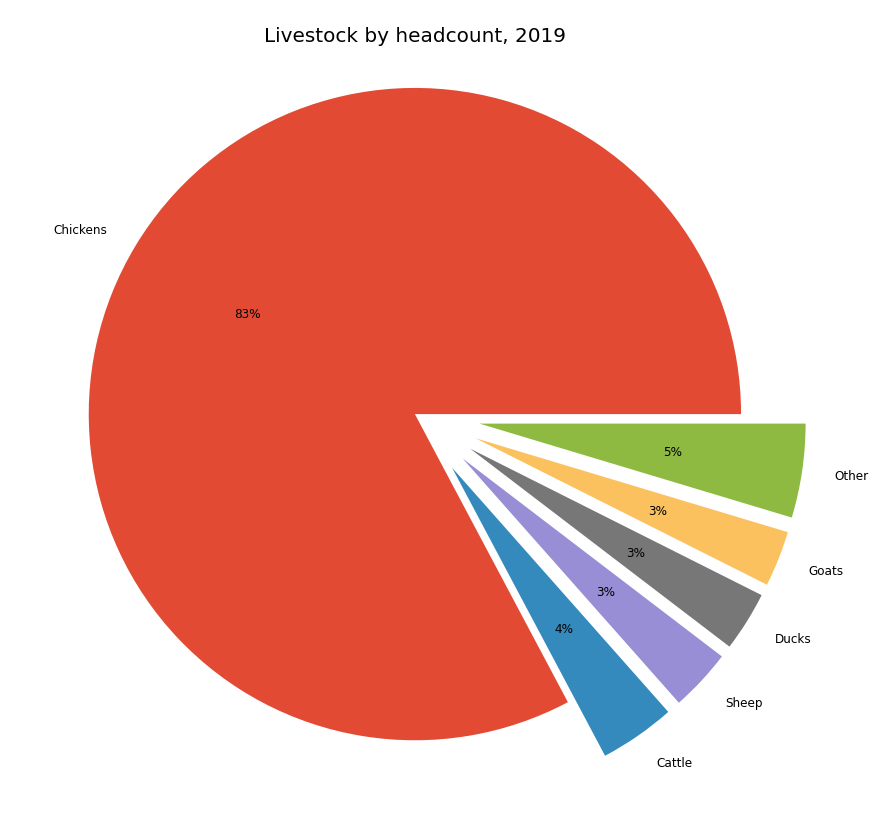

In [46]:
explode = [0, 0.2, 0.2, 0.2, 0.2, 0.2]

livestock_sums_pie['Heads'].plot.pie(explode = explode
                                 ,autopct='%1.0f%%'
                                 ,textprops={'fontsize': 12}, figsize = [15,15])
plt.ylabel('')
plt.title('Livestock by headcount, 2019',
          y = 0.95, size = 20)

plt.show()

Example of misleading statistics above. By biomass, cattle (cows and similar) are 10 times more widespread than chicken, even more so if feed (and, hence, grazing area) requirements are taken into account. Sheep and goats most likely follow. Exploring livestock data requires domain knowledge and/or extra information, the present project will likely focus on crops.

In [47]:
top_7_list = ['Wheat', 'Maize', 'Rice, paddy', 'Soybeans', 'Barley', 'Potatoes', 'Cassava']
top_7_2019_yield = crop_data_countries[(crop_data_countries['Year'] == 2019)
                                       & (crop_data_countries['Item'].isin(top_7_list))
                                       & (crop_data_countries['Element'] == 'Yield')].drop(columns = ['Year', 'Element', 'Unit']).sort_values(by = 'Item')

#replacing with tons per hectar for readability, replacing values and units in a loop across the entire dataset
#took to long to run
top_7_2019_yield['Value'] = top_7_2019_yield['Value']/10000 

top_7_2019_yield_g = top_7_2019_yield.groupby(by = 'Item')
top_7_2019_yield_g.describe()

#yields per country

Value                                                     \
             count       mean        std     min        25%       50%   
Item                                                                    
Barley       102.0   3.363875   1.994765  0.2731   1.940475   2.95480   
Cassava       94.0  12.576353   8.320067  1.0217   6.295275  10.78730   
Maize        166.0   5.001214   4.786985  0.0232   1.690075   3.83975   
Potatoes     156.0  20.969876  10.699990  0.3830  13.912700  19.45325   
Rice, paddy  117.0   4.066794   2.203489  0.2875   2.490600   3.83200   
Soybeans      99.0   1.843000   0.909629  0.3387   1.174350   1.70410   
Wheat        124.0   3.395573   2.197927  0.3982   1.860350   2.81630   

                                 
                   75%      max  
Item                             
Barley        4.236825  10.3809  
Cassava      16.343300  45.0942  
Maize         7.143650  30.1671  
Potatoes     27.843725  50.7522  
Rice, paddy   5.750900   8.7710  
Soybeans      2.556950   4.2499  
Wheat         4.674175   9.5000

In [48]:
top_7_2019_yield_p = top_7_2019_yield[top_7_2019_yield['Area'].isin(primaries)]
top_7_2019_yield_p.groupby(by = 'Item').describe()

#yields per country from top 10 agroproducers list

Value                                                      \
            count       mean        std      min        25%       50%   
Item                                                                    
Barley       10.0   3.919680   1.653542   2.4001   2.729050   3.52480   
Cassava       4.0  18.636800   8.051322  12.9238  14.273575  15.54790   
Maize        10.0   6.485880   2.737527   2.6774   4.476950   6.04535   
Potatoes     10.0  32.067130  10.317677  17.8228  24.953875  32.00535   
Rice, paddy   9.0   6.469378   1.324459   4.0577   5.761500   6.36630   
Soybeans     10.0   2.397070   0.985613   1.1919   1.577975   2.28120   
Wheat        10.0   4.634910   1.908776   2.6578   2.954475   4.21710   

                                 
                   75%      max  
Item                             
Barley        4.039150   6.9774  
Cassava      19.911125  30.5276  
Maize         8.739375  10.5104  
Potatoes     38.121225  50.7522  
Rice, paddy   7.161200   8.3759  
Soybeans      3.116025   4.2499  
Wheat         5.605050   7.7428

In [49]:
top_7_2019_world_yield = crop_world[(crop_world['Year'] == 2019)
                                   & (crop_world['Item'].isin(top_7_list))
                                   & (crop_world['Element'] == 'Yield')].drop(columns = ['Area','Year','Element','Unit'])
top_7_2019_world_yield['Value'] = top_7_2019_world_yield['Value']/10000
top_7_2019_world_yield

#global average weighted yield

,Item,Value
1368192,Barley,3.1060
1369992,Cassava,10.5449
1376823,Maize,5.8127
1381323,Potatoes,21.5353
1382403,"Rice, paddy",4.6312
1384023,Soybeans,2.7674
1387765,Wheat,3.5432


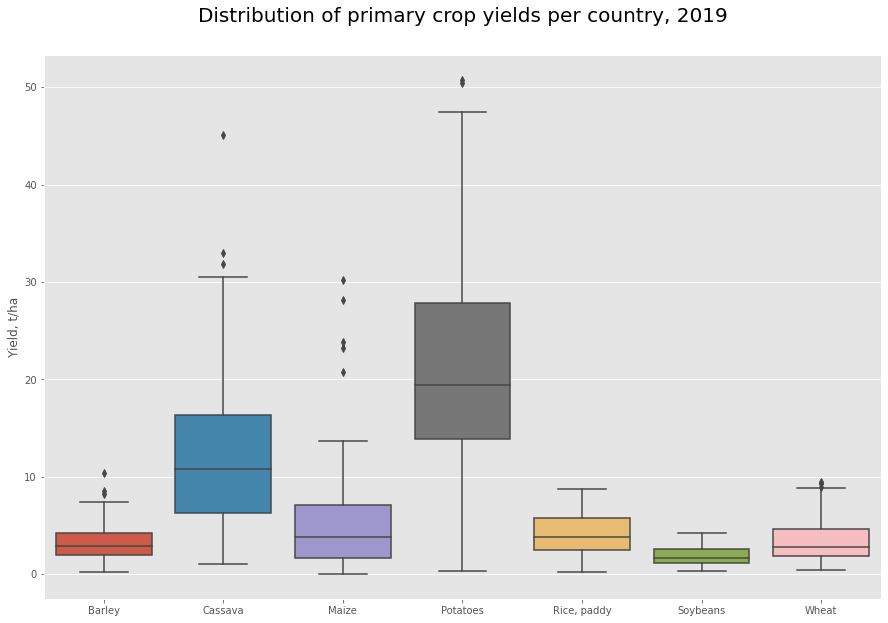

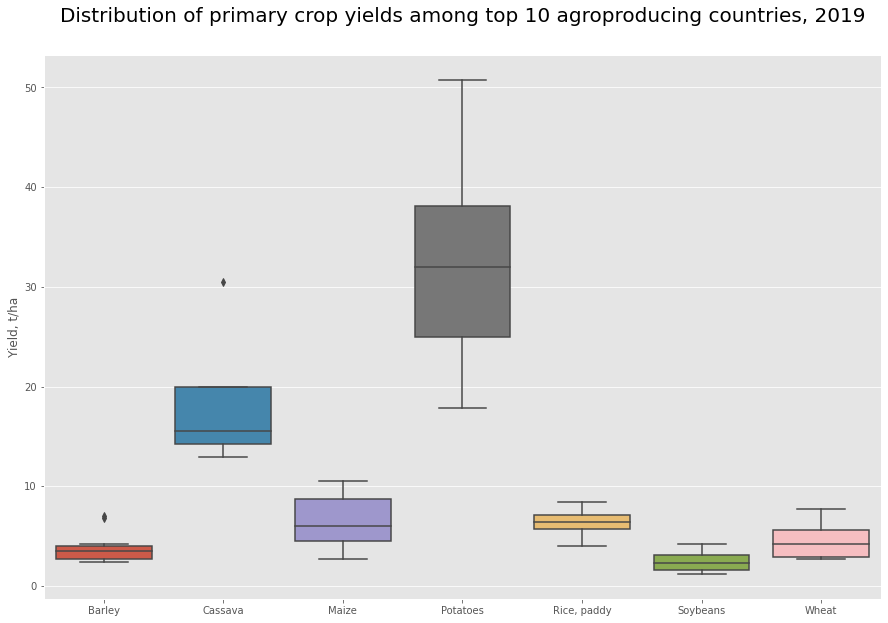

In [70]:
plt.figure(figsize = [15,10])
sns.boxplot(x = 'Item', y = 'Value', data = top_7_2019_yield)

plt.xlabel('')
plt.ylabel('Yield, t/ha')
plt.title('Distribution of primary crop yields per country, 2019', size = 20, y = 1.05)

plt.show()

print('\n','\n')

plt.figure(figsize = [15,10])
sns.boxplot(x = 'Item', y = 'Value', data = top_7_2019_yield_p)

plt.xlabel('')
plt.ylabel('Yield, t/ha')
plt.title('Distribution of primary crop yields among top 10 agroproducing countries, 2019', size = 20, y = 1.05)

plt.show()

Takeaways:
1. Heavily right-skewed distributions with values gravitating to slightly below the mean, implying that most of the world produces at, very roughly, similar effectiveness (give or take seasonal fluctuations and technology levels), with some areas being extremely productive and skewing variation coefficient all the way up to 60%.
2. Top 10 agroproducing countries demonstrate higher yields and less deviations between them, although they are rarely the super-yield countries.
3. Global yields, with the exception of barley and cassava, are slightly higher than means of per-country yields, implying that countries with higher yields tend to focus more on agriculture (or happen to be larger).

In [51]:
area_2019 = crop_world[(crop_world['Year'] == 2019) & (crop_world['Element'] == 'Area harvested')]['Value'].sum()

print('''In 2019 a total of %.2f percent of world land was used for agriculture.
Given a purely hypothetical scenario of seeding all those areas with potatoes and achieving maximum observed yield,
at a 2400 cal diet those areas could sustain roughly %.0f billion people.
Since 1900, forest area lost is estimated at %.2f percent of 2019 agriculture area.'''
      %(area_2019*100/51010000000, area_2019*40/1000000000, 1100000000*100/area_2019))

In 2019 a total of 2.68 percent of world land was used for agriculture.
Given a purely hypothetical scenario of seeding all those areas with potatoes and achieving maximum observed yield,
at a 2400 cal diet those areas could sustain roughly 55 billion people.
Since 1900, forest area lost is estimated at 80.49 percent of 2019 agriculture area.


[World Economic Forum data](https://www.weforum.org/agenda/2022/04/forests-ice-age) was used for forest area above. Given the ratio, and considering that grazing areas for livestock have not been accounted for (although some overlap is to be expected), deforestation trends may indeed be worth investigating further (in a separate project).

In [52]:
top_7_2019_area = crop_data_countries[(crop_data_countries['Year'] == 2019)
                                       & (crop_data_countries['Item'].isin(top_7_list))
                                       & (crop_data_countries['Element'] == 'Area harvested')].drop(columns = ['Year', 'Element', 'Unit']).rename(columns = {'Value':'A_Value'})

In [53]:
top_7_2019_both = pd.merge(top_7_2019_area, top_7_2019_yield, left_on = ['Area', 'Item'], right_on = ['Area', 'Item'], how = 'inner')

In [54]:
top_7_2019_both.isnull().value_counts()

Area   Item   A_Value  Value
False  False  False    False    858
dtype: int64

In [55]:
figure = plt.figure() #study note: running it here prevents displaying an empty figure after the next code block

top_7_2019_both_heat = top_7_2019_both.drop(columns = ['Area']).rename(columns = {'Value': 'Yield, t/ha', 'A_Value':'Area, ha'})
top_7_2019_both_heat.sample(5)

,Item,"Area, ha","Yield, t/ha"
403,"Rice, paddy",1470000.0,7.1612
208,Maize,128265.0,2.3935
449,Cassava,69345.0,8.3820
427,Barley,205071.0,2.2717
209,Potatoes,6319.0,20.4937


<Figure size 432x288 with 0 Axes>

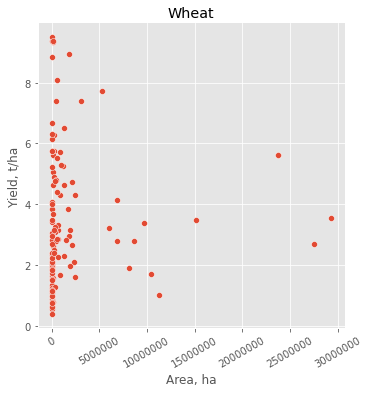

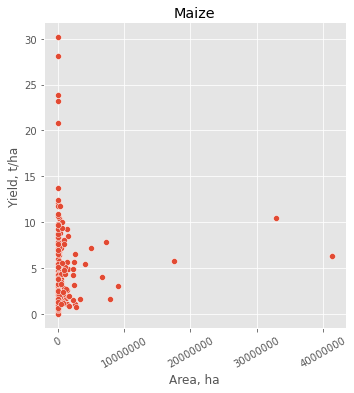

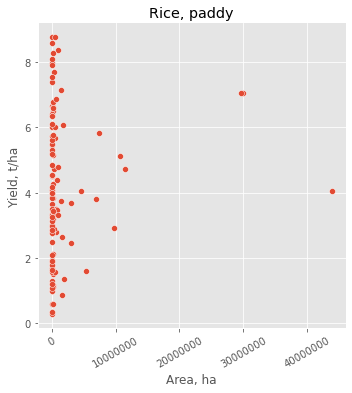

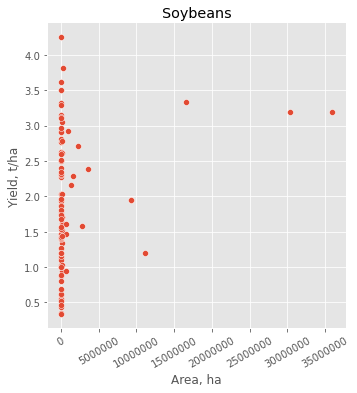

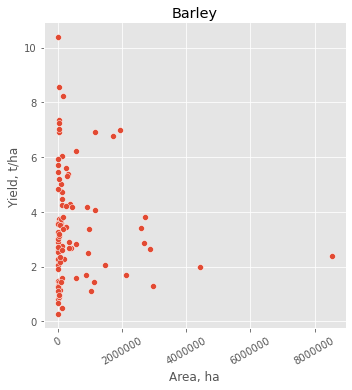

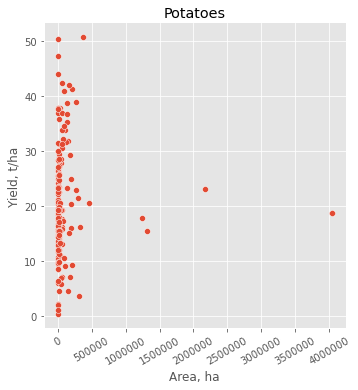

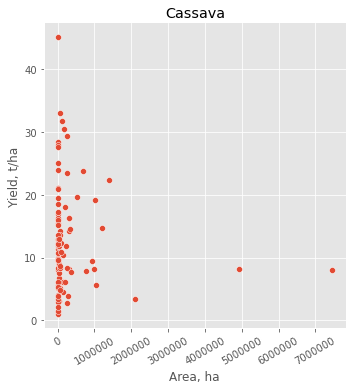

In [56]:
#study note: failed at trying to auto-arrange plots in a 3x3,
#approached by using 'for i, smth in zip(i-smth, metasmth)...add_subplot(331+i)' in various forms

for crop in top_7_list:
    ax = figure.add_subplot()
    data = top_7_2019_both_heat[top_7_2019_both_heat['Item'] == crop]
    sns.relplot(x = data['Area, ha'], y = data['Yield, t/ha'])
    plt.title(crop)
    plt.ticklabel_format(style = 'plain')
    plt.xticks(rotation = 30)
    
plt.show()

In [57]:
print(len(top_7_2019_both_heat[top_7_2019_both_heat['Area, ha'] == 0]['Area, ha']),
      len(top_7_2019_both_heat[top_7_2019_both_heat['Area, ha'] <= 10]['Area, ha']),
      len(top_7_2019_both_heat[top_7_2019_both_heat['Area, ha'] <= 1000]['Area, ha']),
      len(top_7_2019_both_heat[top_7_2019_both_heat['Area, ha'] <= 100000]['Area, ha']))

0 14 119 511


In [58]:
for crop in top_7_list:
    data = top_7_2019_both_heat[top_7_2019_both_heat['Item'] == crop]
    print(crop,'\n',data.corr(),'\n')

Wheat 
              Area, ha  Yield, t/ha
Area, ha     1.000000     0.061463
Yield, t/ha  0.061463     1.000000 

Maize 
              Area, ha  Yield, t/ha
Area, ha     1.000000     0.049937
Yield, t/ha  0.049937     1.000000 

Rice, paddy 
              Area, ha  Yield, t/ha
Area, ha     1.000000     0.121712
Yield, t/ha  0.121712     1.000000 

Soybeans 
              Area, ha  Yield, t/ha
Area, ha     1.000000     0.244881
Yield, t/ha  0.244881     1.000000 

Barley 
              Area, ha  Yield, t/ha
Area, ha     1.000000    -0.057491
Yield, t/ha -0.057491     1.000000 

Potatoes 
              Area, ha  Yield, t/ha
Area, ha     1.000000     0.000335
Yield, t/ha  0.000335     1.000000 

Cassava 
              Area, ha  Yield, t/ha
Area, ha     1.000000    -0.076225
Yield, t/ha -0.076225     1.000000 



Fairly interesting results for the 7 primary crops. None of the values clustered towards the left of the graph are 0, most are simply fairly small in industrial terms. Most countries grow less than 100 000 ha per one of the primary crops; 100 000 ha is roughly the area of Berlin, which is considerable, especially for a small country, but industry-wise in post-Soviet countries that's only around 20 moderate farms.

To briefly summarize:
1. There is no noticeable correlation between harvested areas and yield. Apparently, countries that produce more simply have more territory in general and can spare it for agriculture, and/or prioritise cost efficiency instead of output (for the same reason of having enough territory to spare).
2. There's a huge discrepancy in seeded areas between top results and the rest, which is to be expected given the discrepancy of country areas. For instance, Finland, being a mid-sized country, is roughly 20-40 times smaller than any country from the top 10 agricultural producers list.
2. Unlike other crops on the list, rice and soybeans are seeded in large amounts only by a handful of countries.
3. Cassava and barley demonstrate below average yields in countries with largest seeded areas, while soybeans are above average.

On a separate note, based on the summary above the idea of comparing regional groupings defined in the dataset is dropped at this point, as a single top 10 country being present in the region may significantly skew any aggregate statistics; a precise pre-defined problem statement would be required for proper analysis.

# V. Identifying trends in data

Getting back to the outline of the project, a goal that will be focused in this part is, in layman's terms, determining if the prospects are gloom - more specifically, whether humanity can feed the quickly growing population numbers without having to constantly expand farmable areas.

Sub-goals:
1. Identifying yield growth rates (for selected primary crops as a proxie) over time and comparing them to population growth rates.
2. Identifying farmable area growth rates over time.
3. Goal added to fulfill study project requirements: testing the hypothesis that seeded area growth rates exceed the difference between population growth rate and yield growth rates for primary crops.

In [59]:
top_7_alltime_yield = crop_data_countries[(crop_data_countries['Item'].isin(top_7_list))
                                       & (crop_data_countries['Element'] == 'Yield')].drop(columns = ['Unit', 'Element'])

top_7_alltime_yield['Value'] = top_7_alltime_yield['Value']/10000

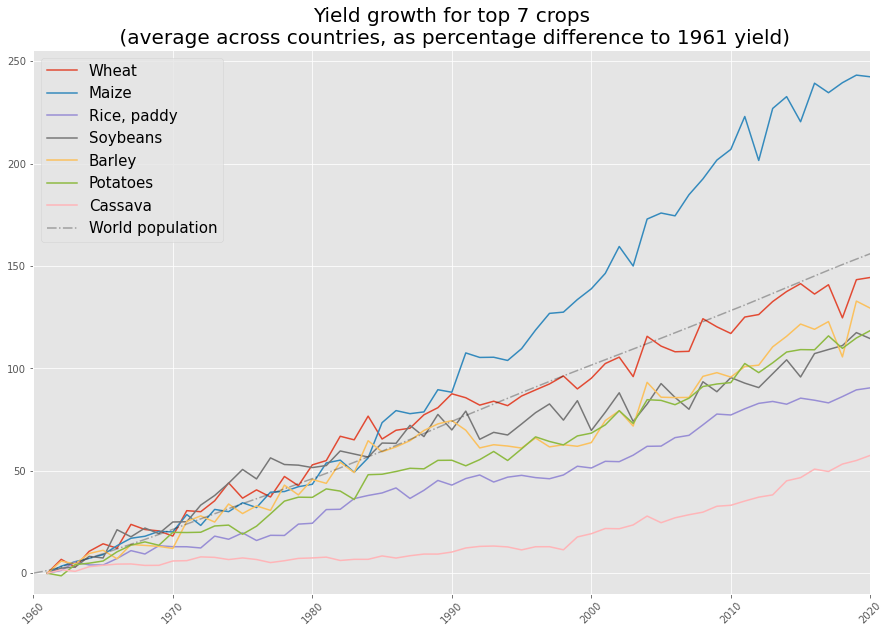

In [60]:
endyield = {} #collecting total yield growths here while transforming data for plots

plt.figure(figsize = [15,10])
for crop in top_7_list:
    data = top_7_alltime_yield[top_7_alltime_yield['Item'] == crop].groupby('Year').mean().sort_values(by = 'Year')
    normalizer = data.iloc[0].copy() #note to self:without copy any changes to original dataframe overwrite the variable
    for i in range(len(data)):
        data.iloc[i] = ((data.iloc[i]/normalizer)-1)*100 #transforming into % growth
    endyield[crop] = data.iloc[len(data)-1,0]
    plt.plot(data,label = crop)

pop_data_world = pop_data[pop_data['Country Name'] == 'World'].drop(columns = ['Country Name', 'Country Code']).transpose(copy = True)
#dataframe was transposed to move years in column names to rows, then change them from strings to match crop graph data
pop_data_world.index = pop_data_world.index.astype(float)
normalizer = pop_data_world.iloc[0].copy()
for i in range(len(pop_data_world)):
    pop_data_world.iloc[i] = ((pop_data_world.iloc[i]/normalizer)-1)*100
plt.plot(pop_data_world, label = 'World population', linestyle = 'dashdot', alpha = 0.3, color = 'black')
    
plt.title('Yield growth for top 7 crops\n (average across countries, as percentage difference to 1961 yield)', size = 20)
plt.ylim(bottom = -10)
plt.xlim(left = 1960, right = 2020)
plt.xlabel('')
plt.xticks(rotation = 45)
plt.legend(loc = 'best',prop = {'size':15})

plt.show()

In [61]:
print('''Over 60 years average crop yields grew by:
%.1f%% for wheat
%.1f%% for maize
%.1f%% for rice
%.1f%% for soybeans
%.1f%% for barley
%.1f%% for potatoes
%.1f%% for cassava''' %(endyield['Wheat'], endyield['Maize'],
      endyield['Rice, paddy'], endyield['Soybeans'], endyield['Barley'],
      endyield['Potatoes'], endyield['Cassava']))

Over 60 years average crop yields grew by:
144.4% for wheat
242.4% for maize
90.5% for rice
114.6% for soybeans
129.4% for barley
118.5% for potatoes
57.6% for cassava


It should be noted that graph above uses averages of country yields, rather than the average yield across the world. Takeaways:
- population demonstrates very steady and slightly increasing growth rate (in absolute numbers, year-on-year rate is decreasing just as steadily), more than doubling every 40 years;
- most key crops demonstrated similar steady yield growth shortly upset by the 90s, ending at 114-144% improvement from 1960 values;
- cassava yields started improving at similar rates only from late 90s;
- maize followed general trend until 1984, then setting on a much steeper upwards trend that lasts till now, ending the period with 242% growth.

Assuming that humanity can sustain current yield growth rates, given current population growth rates they might not be sufficient without increasing production in other ways and will start to lag behind, albeit rather slowly.

Extensive options to approach the issue:
- increasing farmable area;
- restricting global population growth (hopefully not the Malthusian way).

Intensive options:
- eliminating yield difference through relocation, i.e. letting countries with best climate/tech grow relevant crops and trade for it. Likely unfeasible in current global economic structure, brings up national food security issues, and is generally utopian. Besides, results from previous chapter suggest that super-yields are achieved by small countries rather than industrial giants that have the areas to accept such relocation;
- eliminating yield difference by removing technology/soil differences through heavy investments. This will, however, make production less cost-efficient (and energy-efficient);
- re-allocating some farmable area from technical crops or some less efficient crops. For instance, biofuel is a candidate for debate given other available green energy sources;
- using artificial agricultural environments on an industrial scale (hydroponic skyscrapers). This also will make production much less cost-efficient;
- experimenting with ocean farms.

In [62]:
#calculating y-o-y mean yield growth for primary crops, as ratio to previous year, in preparation for part VI

#unlike above, using total world data, and not average of country yields

#yield changes from different crops are averaged; using weighted (by calories per ha average as of now?) means could
#get more precision

temp = crop_world[(crop_world['Item'].isin(top_7_list))
                             & (crop_world['Element'] == 'Yield')].drop(columns = ['Area','Element','Unit']).copy()
temp = temp.groupby('Year').mean()

crop7_data_world = temp.copy()

for i in range(len(temp)-1):
    crop7_data_world.iloc[i+1] = temp.iloc[i+1]/temp.iloc[i]
crop7_data_world.iloc[0] = 1
    
crop7_data_world.head()

,Value
Year,
1961,1.000000
1962,0.990733
1963,1.035978
1964,1.048362
1965,0.990430


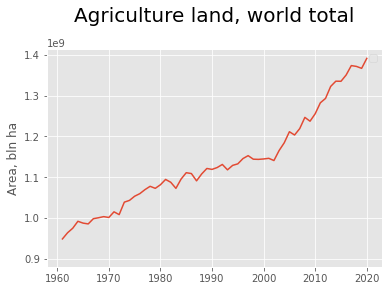

In [63]:
data = crop_world[crop_world['Element'] == 'Area harvested'].drop(columns = ['Area','Element','Unit']).copy()
data = data.groupby('Year').sum()

data.plot(label = None)
plt.title('Agriculture land, world total', size = 20, y = 1.1)

plt.ylim(bottom = 0.88*10**9)
plt.xlabel('')
plt.ylabel('Area, bln ha')
plt.legend('')

plt.show()

Despite rather promising yield growths we've seen, more and more areas have been used in agriculture over the years, totalling +47% over the time period, which already speaks in favor of the project hypothesis.

In [64]:
#transforming global population data to the same y-o-y format for part VI

for i in range(len(pop_data_world)-1):
    pop_data_world.iloc[i+1] = (pop_data_world.iloc[i+1]/100)+1
temp = pop_data_world.copy()
for i in range(len(pop_data_world)-1):
    pop_data_world.iloc[i+1] = temp.iloc[i+1]/temp.iloc[i]

pop_data_world.iloc[1] = 1
pop_data_world = pop_data_world.iloc[1:61].rename(columns = {259:'Value'})
    
pop_data_world.head()

,Value
1961.0,1.000000
1962.0,1.017243
1963.0,1.020833
1964.0,1.020532
1965.0,1.020552


# VI. Hypothesis testing

As a finishing touch for the purpose of this project, hypothesis on expansiveness of the agricultural industry will be tested, namely whether farmable areas grow at a higher pace than would be required to compensate for the difference between population growth and yield growth.

Expected result should be clear by now through eyeballing the data, as demonstrated on a graph below.

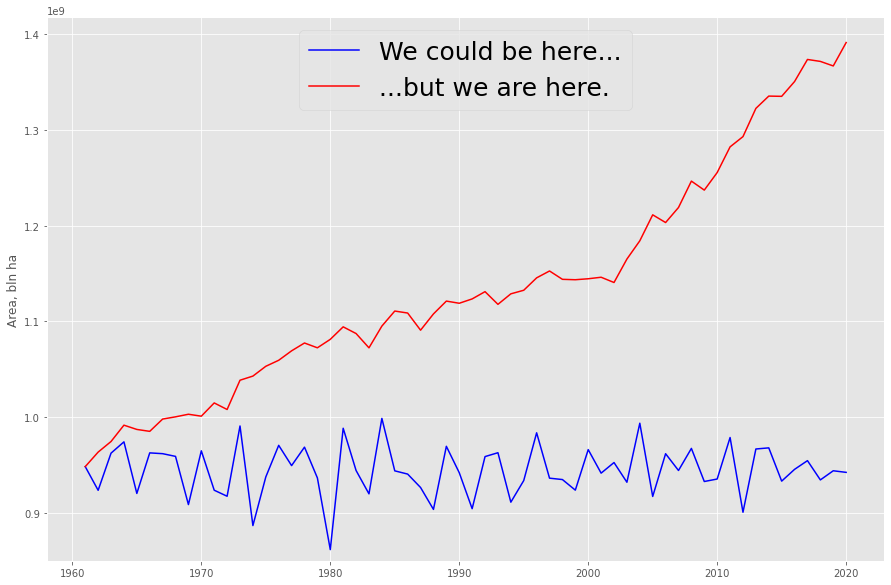

In [65]:
data1 = data.copy() #data is a temporary series (with area per year) from the previous graph that can be reused
base = data1.iloc[0]
for i in range(len(data1)-1):
    data1.iloc[i+1] = base*(crop7_data_world.iloc[i+1]/pop_data_world.iloc[i+1,0]) #note to self: population df required a second positional index, not identical in properties somehow

plt.figure(figsize = [15,10])
    
plt.plot(data1, label = 'We could be here...', color = 'blue')
plt.plot(data, label = '...but we are here.', color = 'red')


plt.ylim(bottom = 0.85*10**9)
plt.xlabel('')
plt.ylabel('Area, bln ha')
plt.legend(prop={'size': 25}, loc = 'upper center')

plt.show()

Note to self: do NOT plot multiple graphs on a single plot via a method.

Blue line on the graph demonstrates necessary seeded areas to maintain 1961 levels of production per capita given population growth rate and average yield growth of the 7 primary crops (as a proxy for overall crop yields).

To test the hypothesis via statistic means, t-test and Granger causality will be performed. It is worth noting that while sufficient to get the general idea on significantly different series, none of it is statistically perfect:
- number of observations (60 annual datapoints) is fairly low;
- t-test ignores the timeline component;
- average yields of top crops are used instead of global yields on the assumptions that rest of the crops would be niche quantity-wise, or have little to do with feeding humanity (technical and lifestyle crops, chattel feed to some extent);
- Granger test would generally be more useful within VAR, rather than as a standalone;
- lag value for Granger was set blindly;
- top crop yields are averaged without applying weights. Selection of weights and top crops would be better done with some domain knowledge.

Series plotted above, namely historic values of area under crops (data), and theoretic values of necessary areas that were calculated based on the difference in top crop yields and population growth over time (data1).

Null hypothesis for t-test: difference in data and data1 series means is 0.

Test codeblock courtesy of Dr. Jason Brownlee and his [helpful hints](https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/).

In [66]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(data, data1)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably the same distribution')
else:
    print('Probably different distributions')

stat=12.308, p=0.000
Probably different distributions


Null was successfully regected, i.e. series means appear to be substantially different.

Granger test requires a reversed null: lagged values in the first series do not explain the fluctuations in the second. Below the test is run in both directions.

In [67]:
data_gr = data.copy().rename(columns = {'Value':'Value historic'})
data_gr['Value theoretic'] = data1['Value']
from statsmodels.tsa.stattools import grangercausalitytests as grgr

grgr(data_gr[['Value theoretic', 'Value historic']], maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=1.0559  , p=0.3976  , df_denom=44, df_num=5
ssr based chi2 test:   chi2=6.5996  , p=0.2522  , df=5
likelihood ratio test: chi2=6.2327  , p=0.2842  , df=5
parameter F test:         F=1.0559  , p=0.3976  , df_denom=44, df_num=5


{5: ({'ssr_ftest': (1.055935646381526, 0.39756895080008636, 44.0, 5),
   'ssr_chi2test': (6.5995977898845375, 0.2521616018209654, 5),
   'lrtest': (6.232718574538467, 0.2842285204444817, 5),
   'params_ftest': (1.055935646381359, 0.3975689508001777, 44.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In [68]:
data_gr = data.copy().rename(columns = {'Value':'Value historic'})
data_gr['Value theoretic'] = data1['Value']
from statsmodels.tsa.stattools import grangercausalitytests as grgr

grgr(data_gr[['Value historic', 'Value theoretic']], maxlag=[5])


Granger Causality
number of lags (no zero) 5
ssr based F test:         F=0.2953  , p=0.9129  , df_denom=44, df_num=5
ssr based chi2 test:   chi2=1.8457  , p=0.8701  , df=5
likelihood ratio test: chi2=1.8154  , p=0.8741  , df=5
parameter F test:         F=0.2953  , p=0.9129  , df_denom=44, df_num=5


{5: ({'ssr_ftest': (0.29531215405710964, 0.9129467578300924, 44.0, 5),
   'ssr_chi2test': (1.8457009628569352, 0.8700566538362619, 5),
   'lrtest': (1.8154076269208872, 0.874051538823226, 5),
   'params_ftest': (0.2953121540571277, 0.9129467578300816, 44.0, 5.0)},
   array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]])])}

In both cases sufficient evidence to reject the null has not been found. Spikes in theoretic data may have borne some occasional resemblance to spikes in historic data (not the other way around), yet according to test results neither of the two series may be used to forecast the other.

# VII. Summary and concluding remarks

Dataset contains information, per country and per year over the last 60 years, on:
- yield, production and seeded area per crop;
- headcount per type of livestock;
- population.

Noteable lacking data includes:
- grazing area per type of livestock;
- calorie per unit weight/count 'value map' for crops and livestock;
- total area and forest area per country;
- uniform naming and grouping of countries (country data table uses a separate naming/grouping convention).

Exploring the dataset revealed that half the world's agricultural areas are seeded by wheat, maize, rice and soybeans, other crops lagging noticeably behind.

7 most commonly used crops were picked to analyse yields, excluding technical/'lifestyle'/chattel feed crops.

Distribution of yields between coutries demonstrates high variability, with a variance coefficient at ~60%. Top agricultural producing countries demonstrated far less variability between themselves, demonstrating roughly average yields, below average for cassava and barley, above average for soybeans.

Average yields for the 7 crops grew roughly at the same rate as global population (+155% over 60 years). Most crop yields lagged slightly behind population growth rates, cassava achieved similar yield growth rates only from late 90s, while maize demonstrated tremendous improvements over the last several decades.

Available data does not contradict the supposition that humanity could sustain the growing population through purely intensive improvements to the agricultural industry, without expansions of farmable areas. Moreover, high yield variability and observed distribution of seeded areas suggest several options at increasing production if need be by optimizing allocation of area to crops and/or sacrificing energy efficiency for higher yields (a purely hypothetical scenario of seeding all the world's agricultural areas with potatoes at max observed yield allows to feed 55 billion people, which at the very least suggests there's some leeway for optimization).

However, historic data demonstrates a 47% increase a farmable area over the time period, up to current figure of 2.68% of global land area, despite yields seemingly able to keep up with population growth.

Further data exploration, requiring additional data, could be continued along the following lines:
1. Possible changes to seeded area allocations to optimize efficiency (in calories per unit of land per year).
2. Comparing meat vs plant food efficiency and exploring historic trends for husbandry.
3. Exploring food security issue: determining ability of countries, as well as clusters of interconnected countries, to provide for own population, and determining clustering of net-producing and net-importing countries.
4. Looking at deforestation trends and determining the extent to which they may be driven by agricultural needs.